<a href="https://colab.research.google.com/github/Imtiaz-Uddin-2214/Credit_card_default/blob/main/Credit_card_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Default Prediction Using ML model**

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#Upload .csv file
df = pd.read_csv('UCI_Credit_Card.csv')

**Data processing & EVC**

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


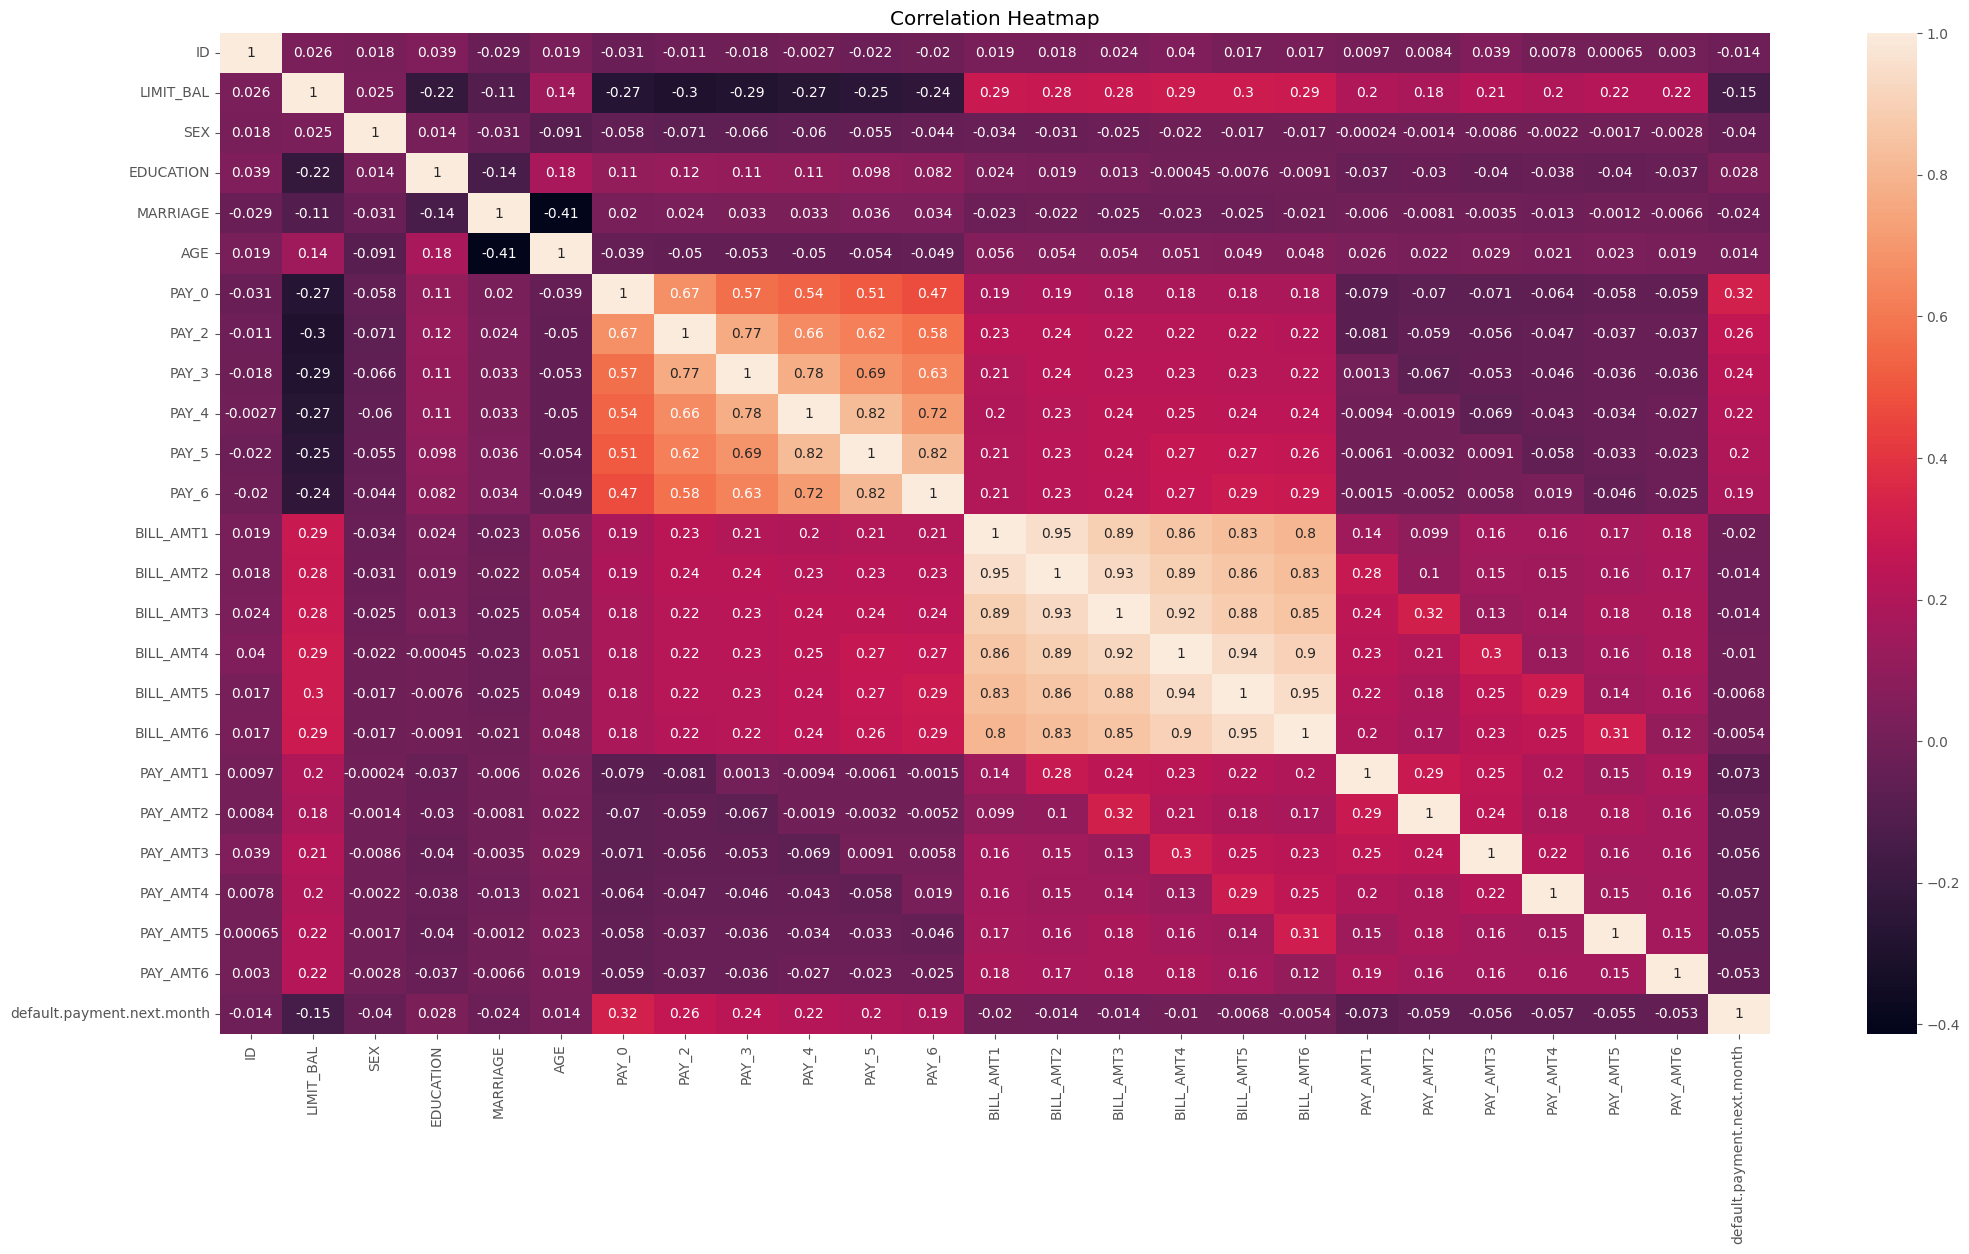

In [ ]:
# draw heatmap
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

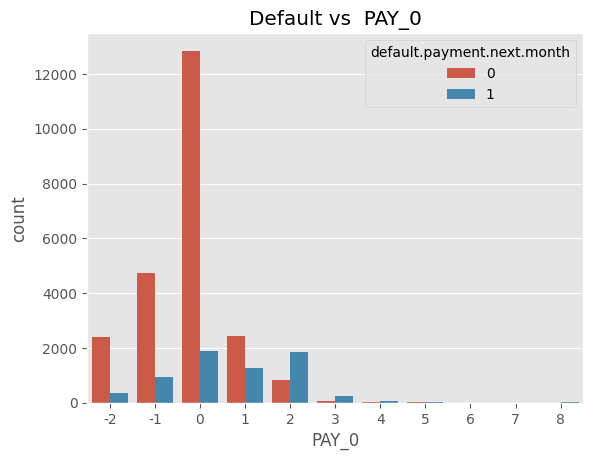

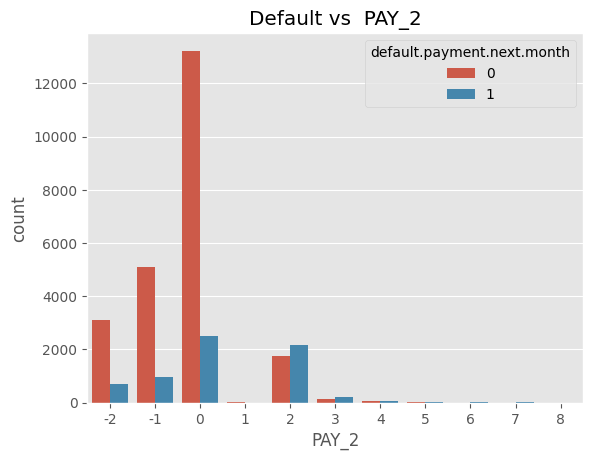

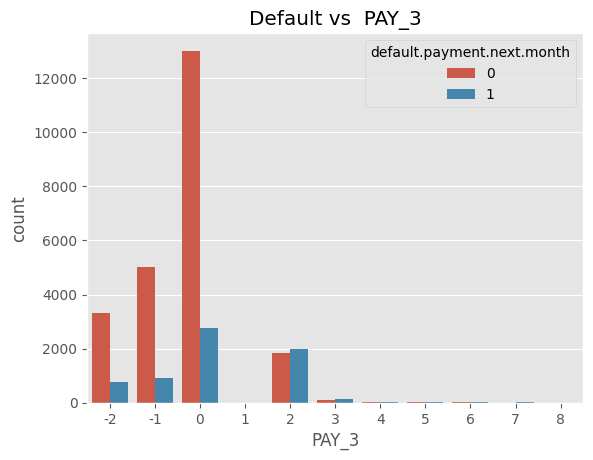

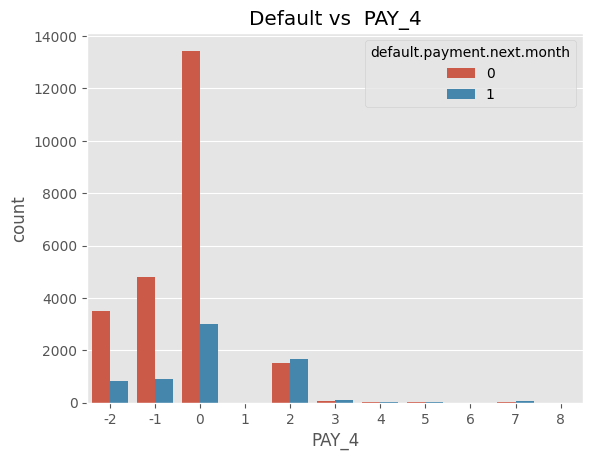

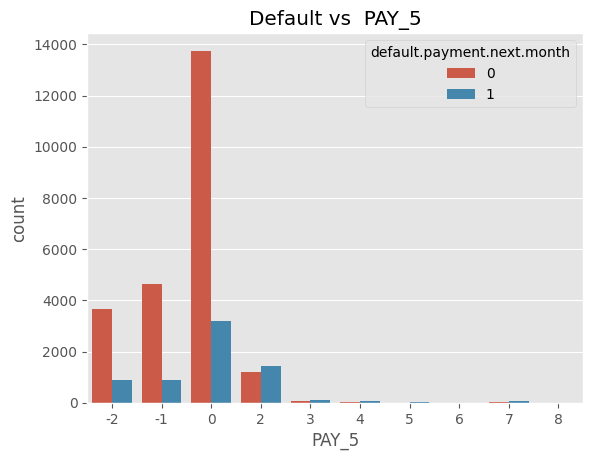

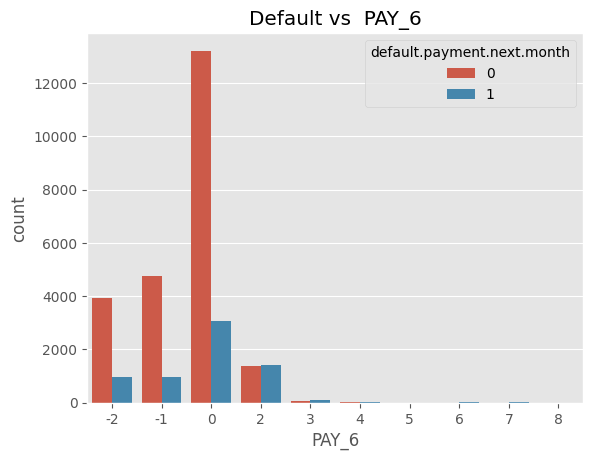

In [ ]:
payment_history_col = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_col:
    sns.countplot(x = col, hue = 'default.payment.next.month', data = df)
    plt.title(f'Default vs  {col}')
    plt.show()

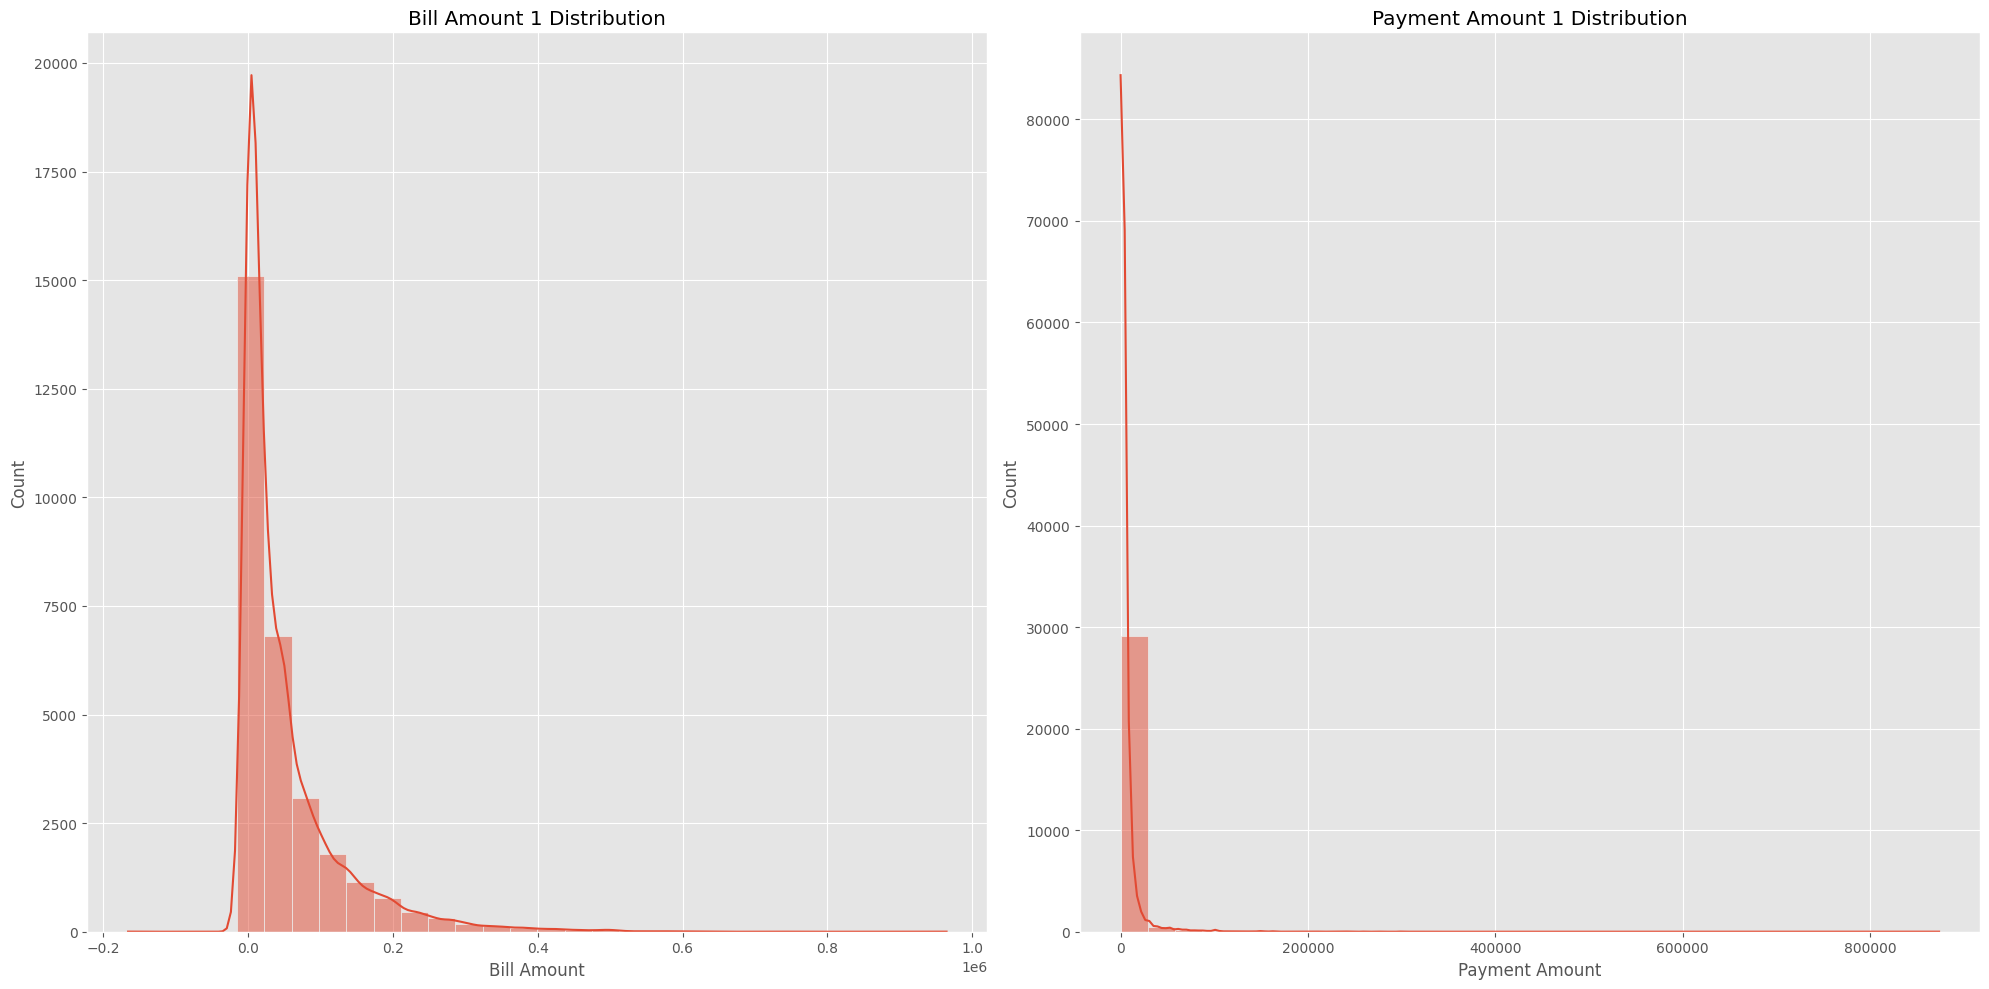

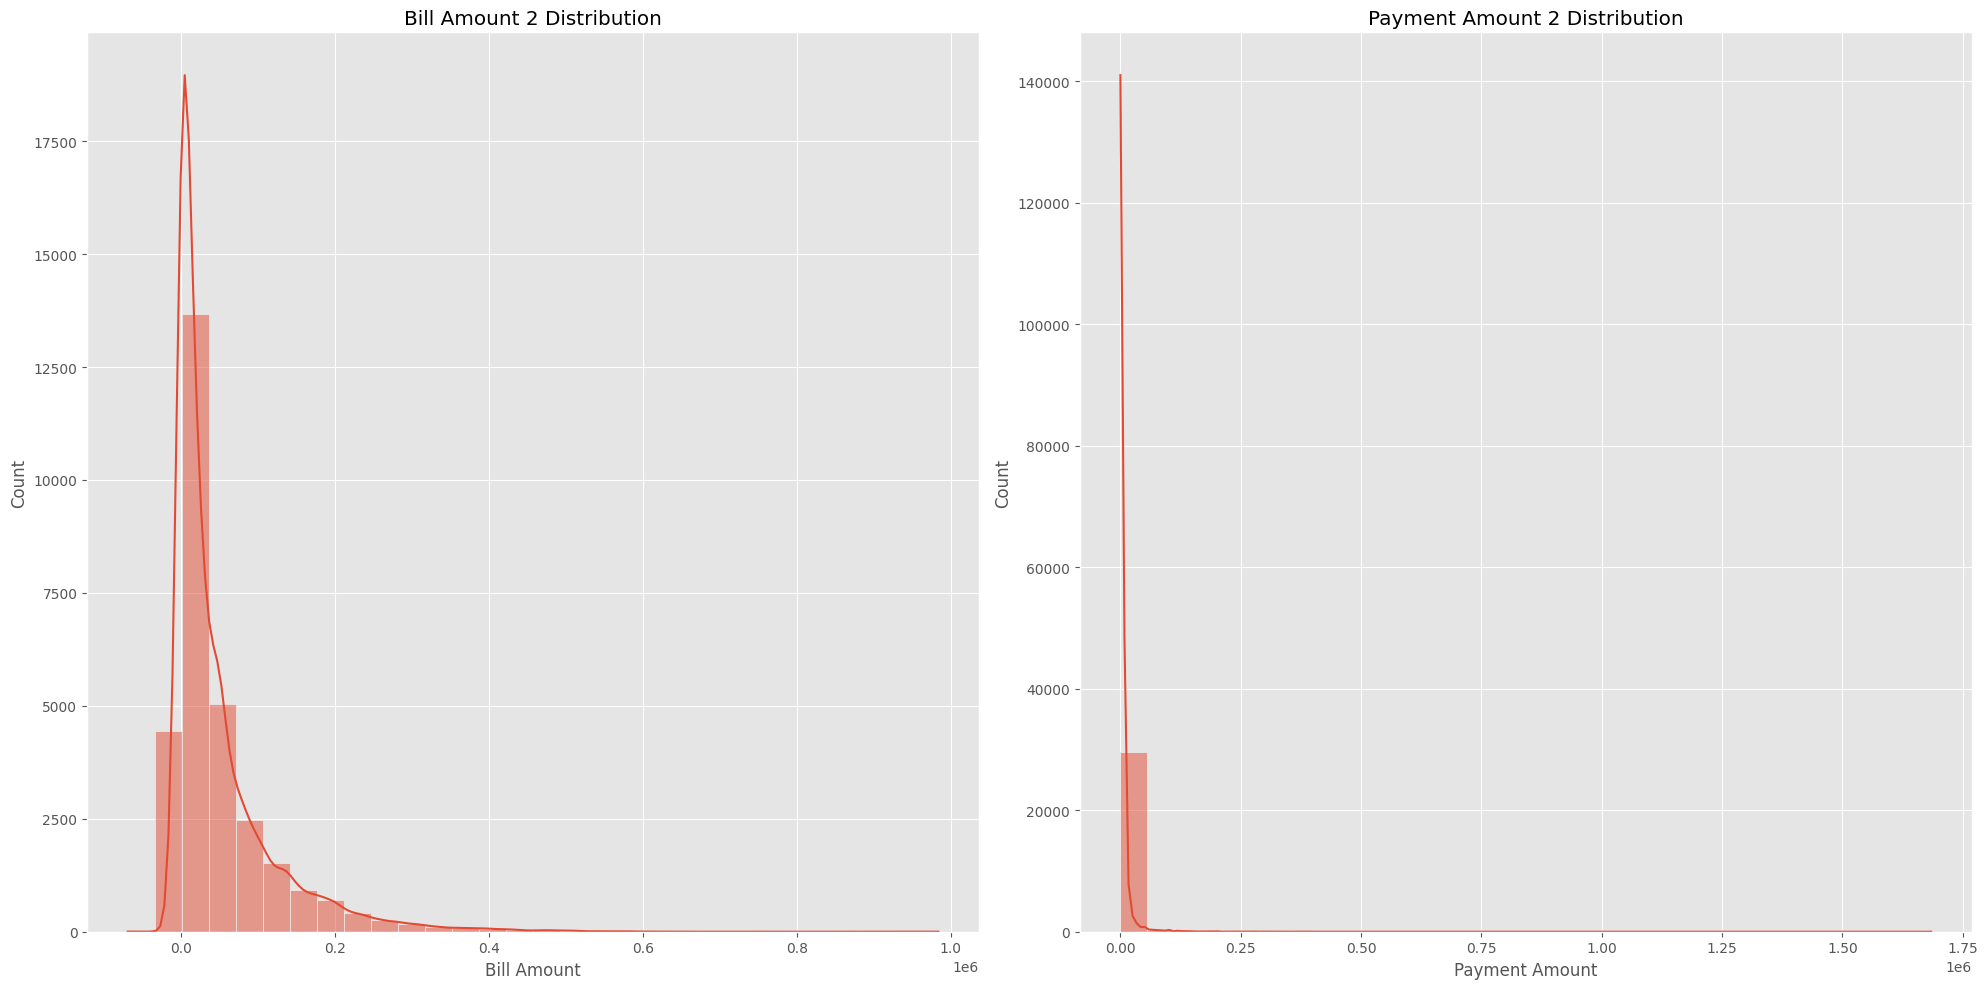

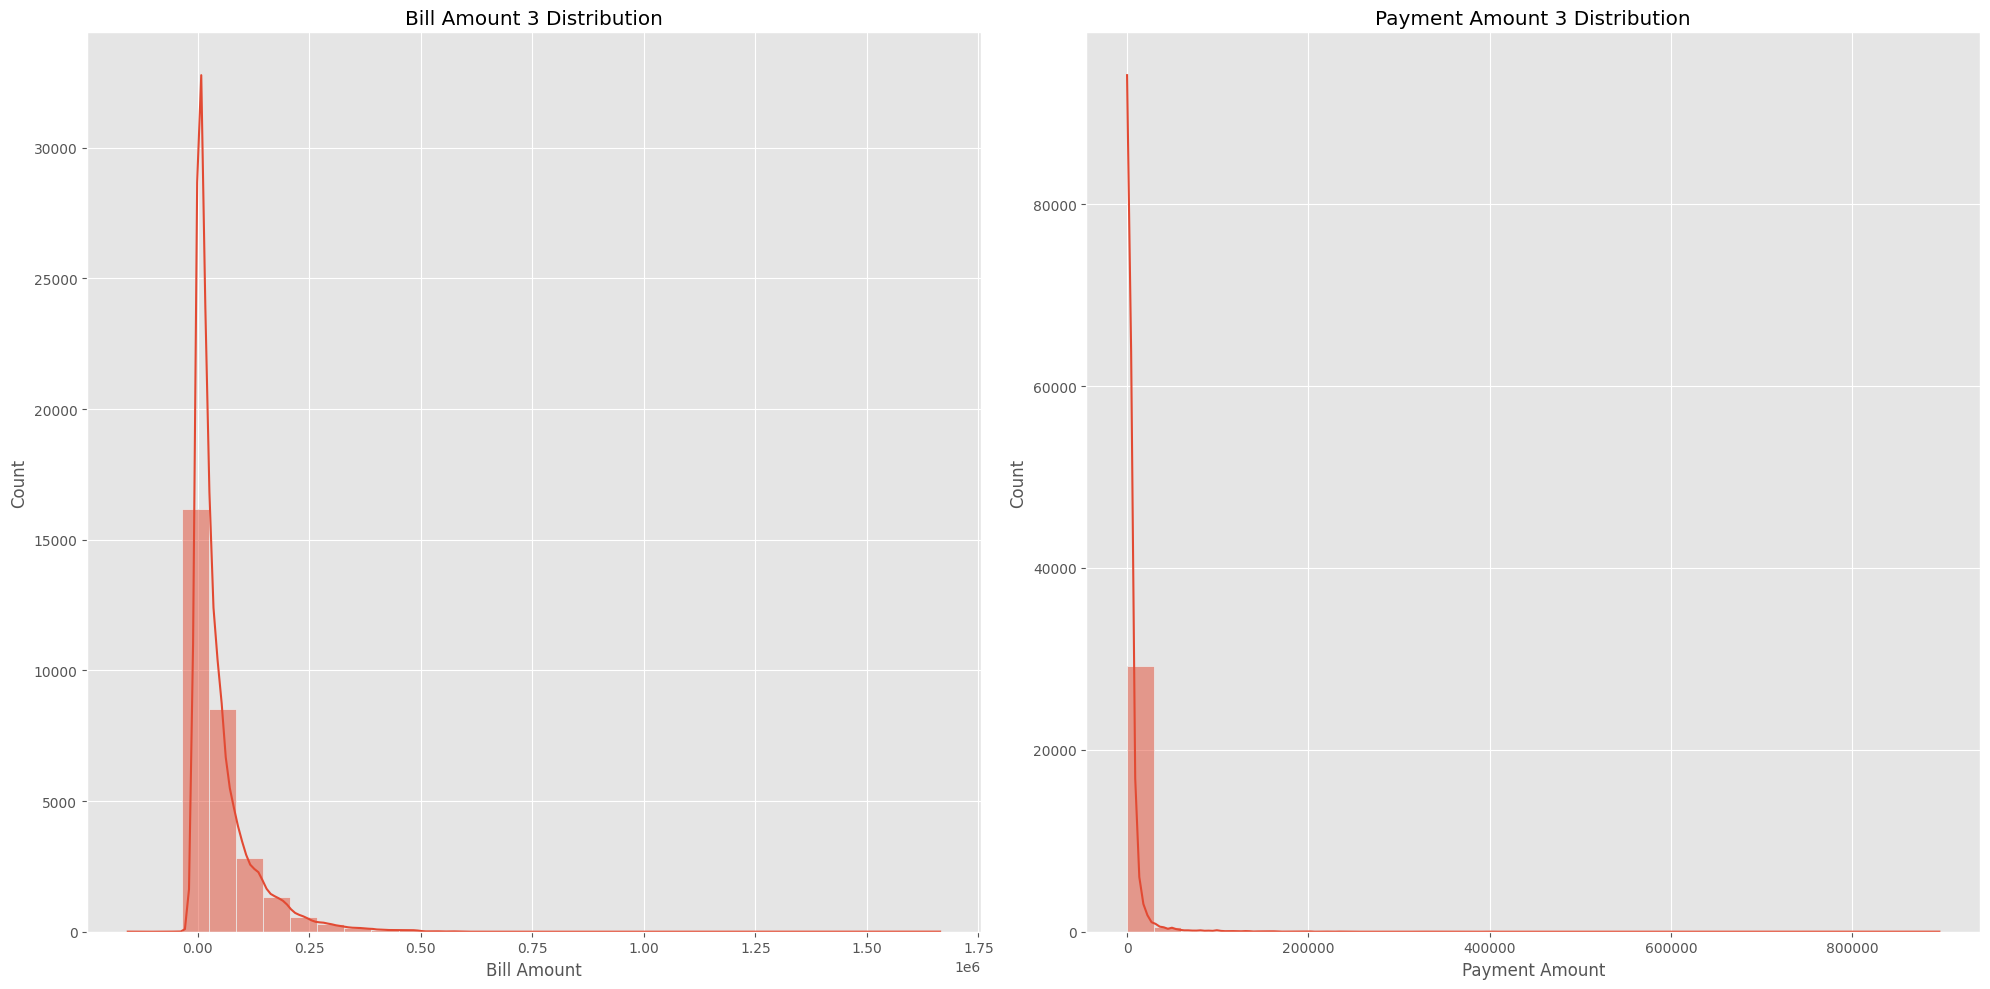

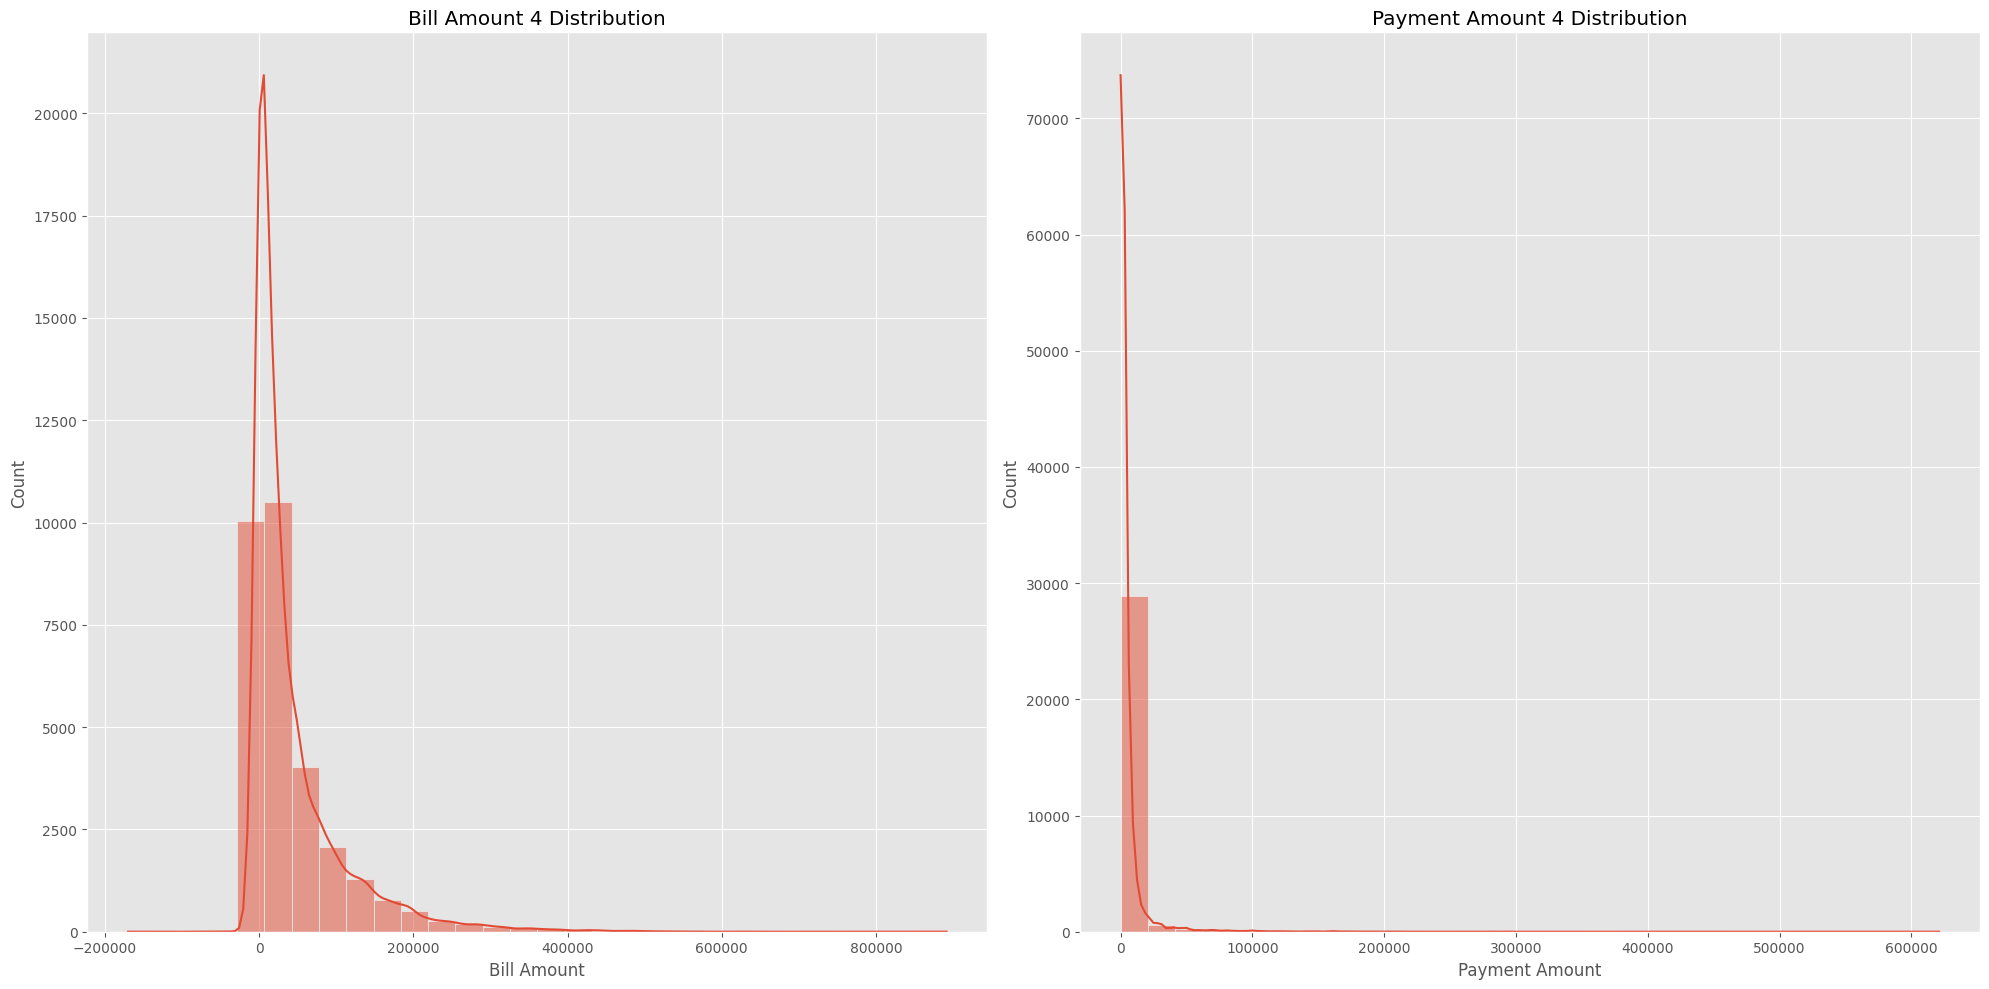

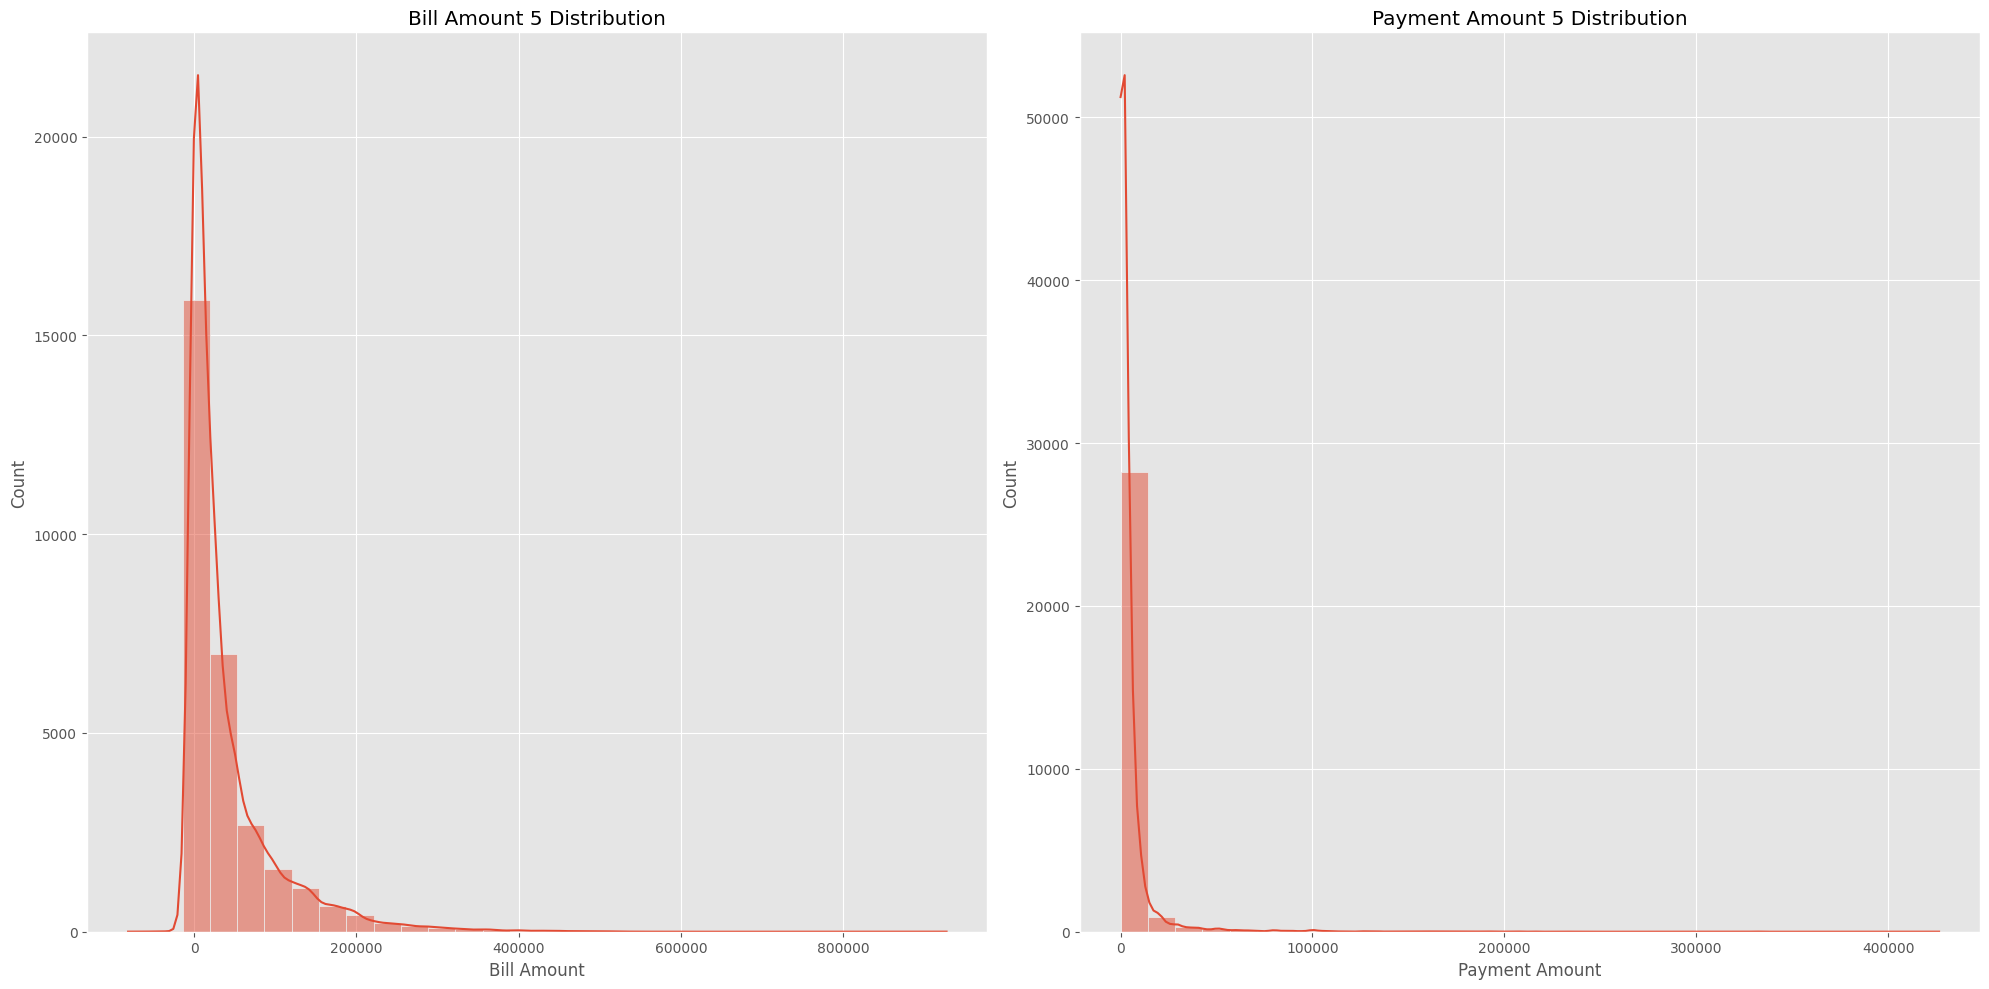

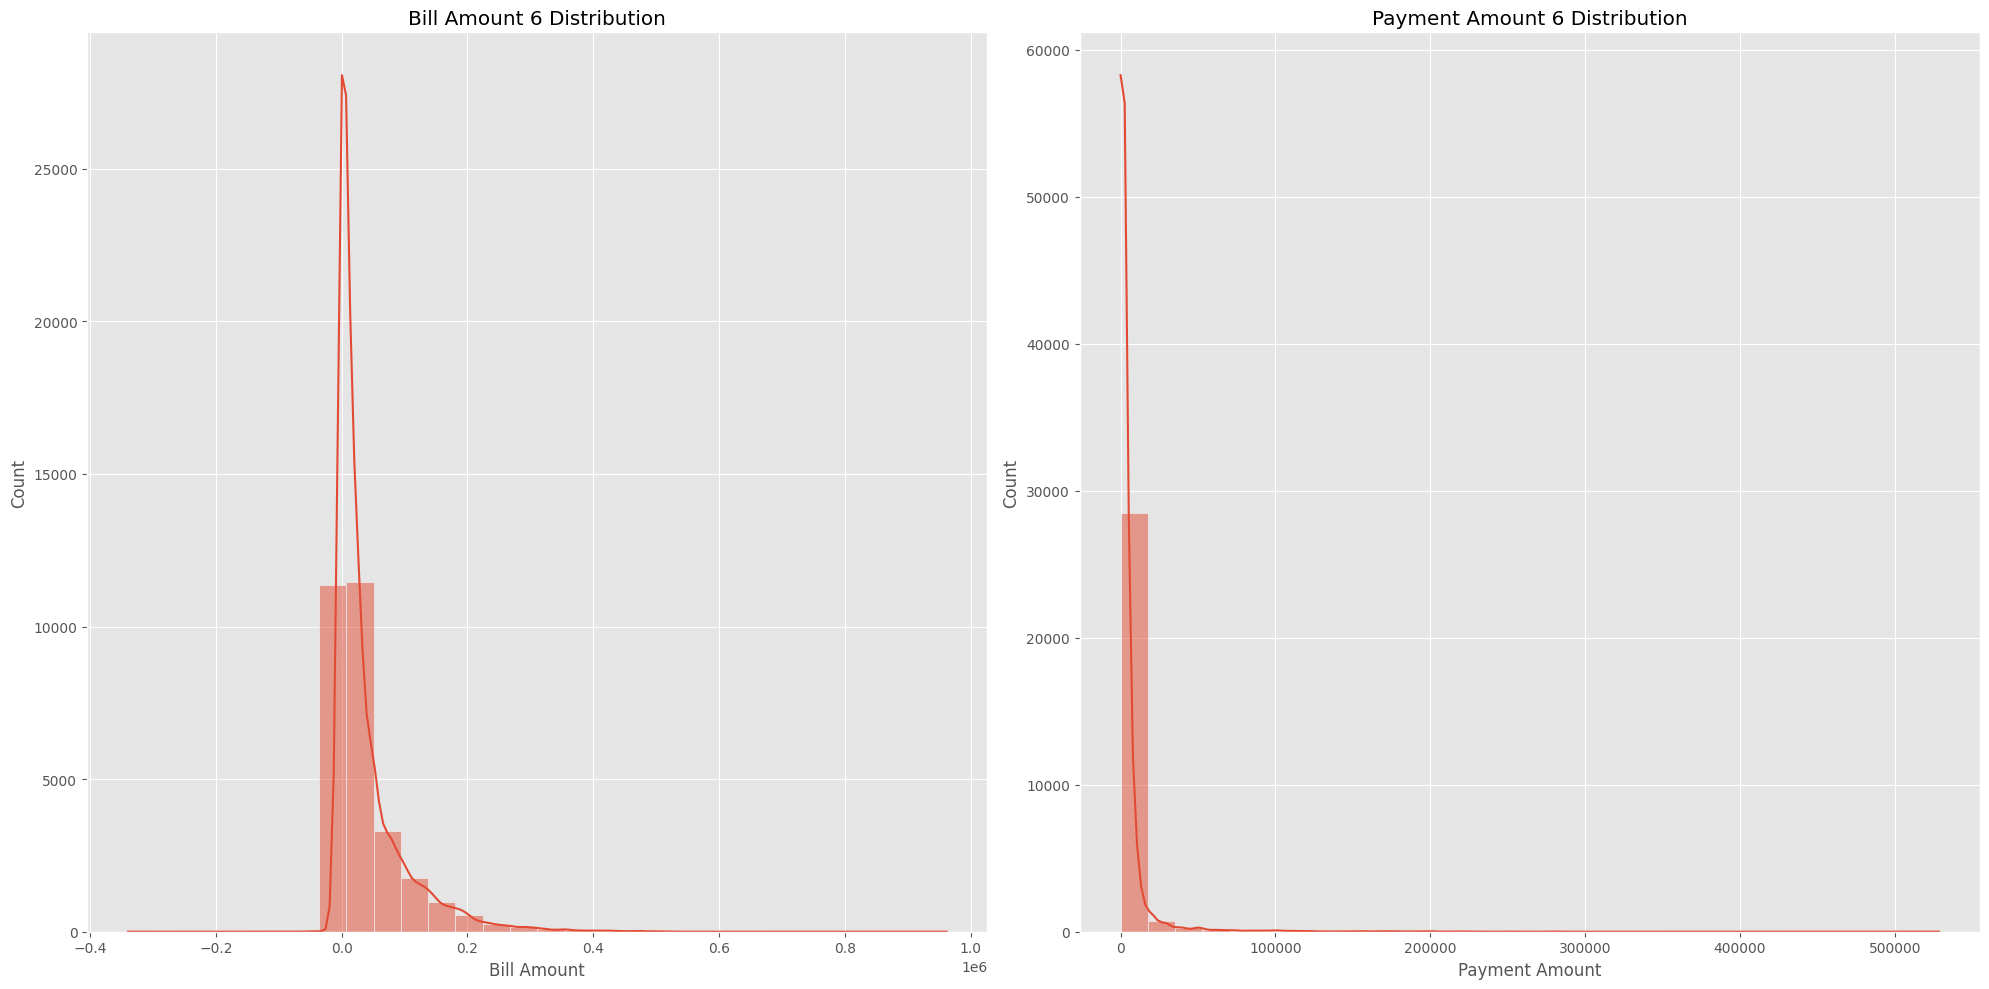

In [ ]:
for i in range(1, 7):
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df[f'BILL_AMT{i}'], bins = 30, kde = True)
    plt.title(f'Bill Amount {i} Distribution')
    plt.xlabel('Bill Amount')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(df[f'PAY_AMT{i}'], bins = 30, kde = True)
    plt.title(f'Payment Amount {i} Distribution')
    plt.xlabel('Payment Amount')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

In [ ]:
# df = df.drop('ID', axis = 'columns')
df.sample()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19074,260000.0,2,1,1,37,0,0,0,0,0,...,156248.0,120518.0,122649.0,10000.0,8000.0,5028.0,5000.0,5000.0,10000.0,0


<ipython-input-59-6a37270a95bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'blue')


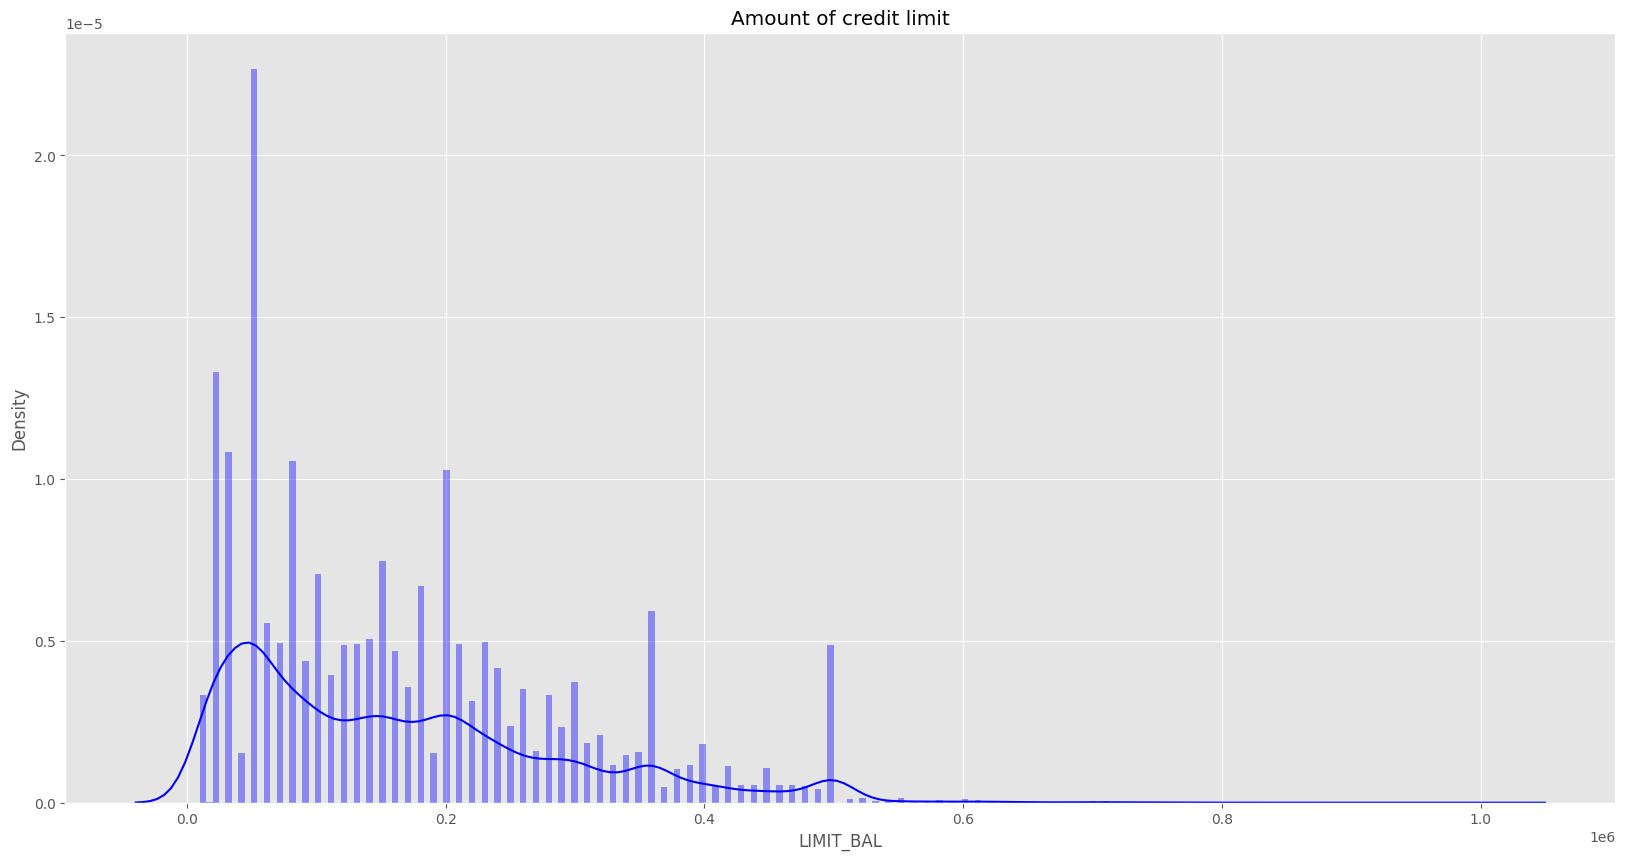

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Amount of credit limit')
sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'blue')
plt.show()

<ipython-input-60-61b767c27e92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
<ipython-input-60-61b767c27e92>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0, kde = True, bins = 200, color = 'red')


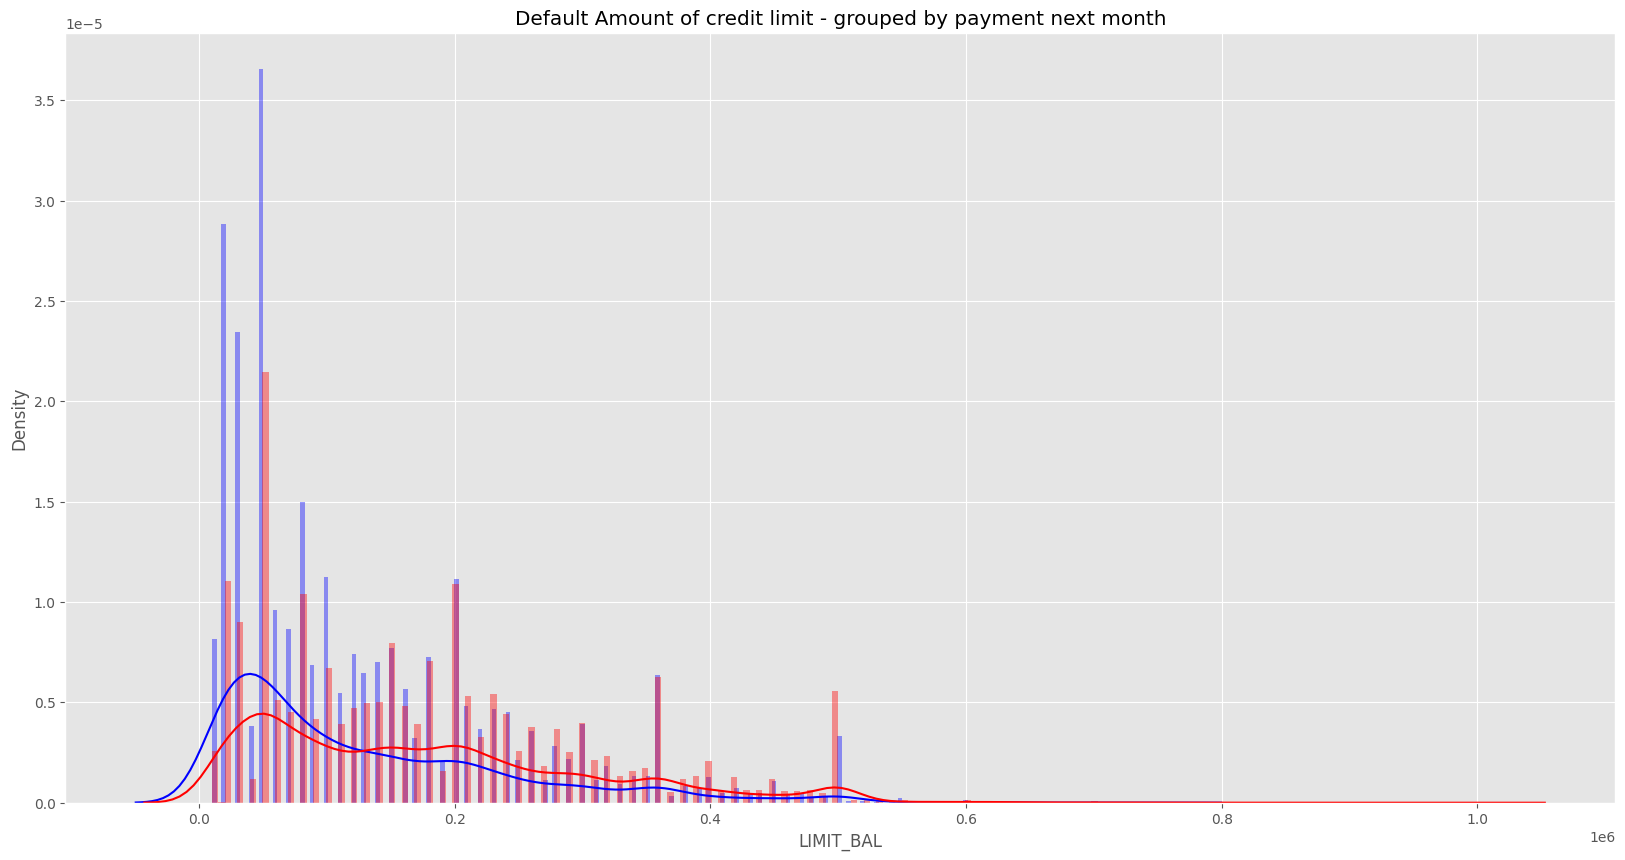

In [ ]:
class_0 = df.loc[df['default.payment.next.month'] ==  0]['LIMIT_BAL']
class_1 = df.loc[df['default.payment.next.month'] ==  1]['LIMIT_BAL']

plt.figure(figsize = (20,10))
plt.title('Default Amount of credit limit - grouped by payment next month')
sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
sns.distplot(class_0, kde = True, bins = 200, color = 'red')
plt.show()

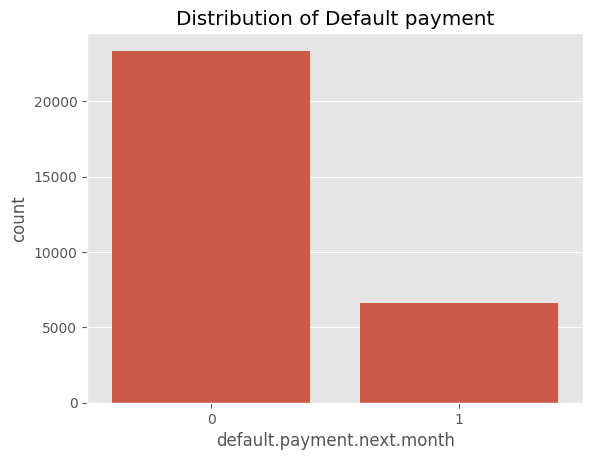

In [ ]:
sns.countplot(x = 'default.payment.next.month', data = df)
plt.title('Distribution of Default payment')
plt.show()

<Axes: >

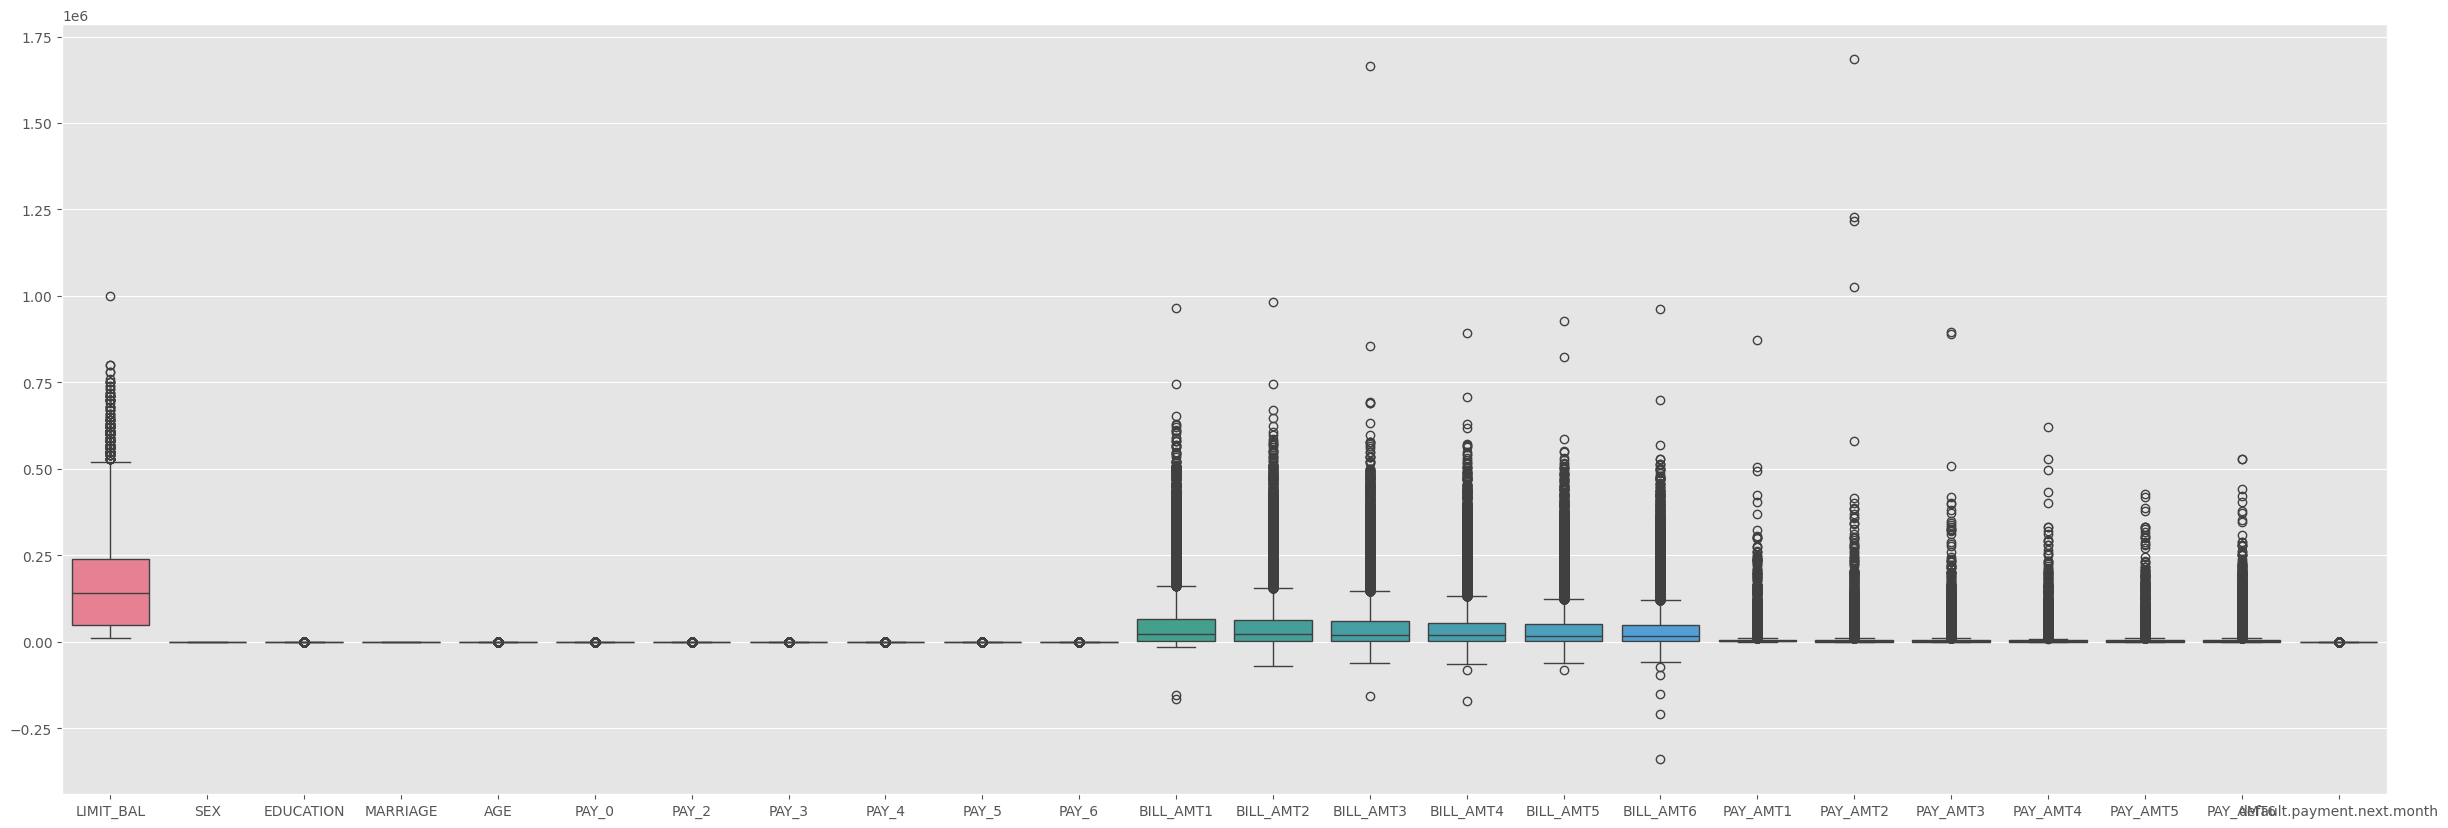

In [ ]:

plt.figure(figsize = (30, 10))
sns.boxplot(data = df)

**Building Machine Learning Model**

In [ ]:
# Separte features and target variable
X = df.drop('default.payment.next.month', axis = 1)
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**RandomForest**

In [ ]:
# Import RandomForestClassifier from the correct module: sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display the results
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.8161666666666667
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
# Import SVM from the correct module: sklearn.svm
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Display the results
print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(class_report_svm)


SVM Accuracy: 0.8193333333333334
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.68      0.33      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



**LogisticRegression**

In [ ]:
# Import LogisticRegression from the correct module: sklearn.Linear
from sklearn.linear_model import LogisticRegression
# Import necessary modules
from sklearn.metrics import accuracy_score, classification_report

Logistic_model = LogisticRegression()
# Train the model
Logistic_model.fit(X_train_scaled, y_train)
y_pred = Logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



**DecisionTreeClassifier**

In [ ]:
# Import DecisionTreeClassifier from the correct module: sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import necessary modules
from sklearn.metrics import accuracy_score, classification_report

DT_model = DecisionTreeClassifier()

DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.7215
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.37      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.73      6000



In [ ]:
# Create pickle file
import pickle
pickle.dump(svm_model, open('model.pkl', 'wb'))